In [62]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import describe

In [63]:
#Download the prices
symbol = 'GOOGL'
start = dt.date.today() - dt.timedelta(days = 365*10)
end = dt.date.today()
df_google = yf.download(symbol,start,end)
df_google.head()
df_google.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-26,322.822815,325.070068,320.090088,324.989990,324.989990,3634762
2012-03-27,323.838837,327.077087,322.722717,323.833832,323.833832,4010386
2012-03-28,326.341339,329.624634,325.865875,328.208221,328.208221,5072722
2012-03-29,327.047058,328.623627,322.472473,324.529541,324.529541,3844751
2012-03-30,326.201202,327.072083,320.820831,320.940948,320.940948,4616779


In [64]:
#Calculate the simple and log returns using the adjusted close prices
df_google.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df_google['simple_return'] = df_google.adj_close.pct_change()
df_google['log_return'] = np.log(df_google.adj_close/df_google.adj_close.shift(1))

df_google.head()

,Open,High,Low,Close,adj_close,Volume,simple_return,log_return
Date,,,,,,,,
2012-03-26,322.822815,325.070068,320.090088,324.989990,324.989990,3634762,NaN,NaN
2012-03-27,323.838837,327.077087,322.722717,323.833832,323.833832,4010386,-0.003558,-0.003564
2012-03-28,326.341339,329.624634,325.865875,328.208221,328.208221,5072722,0.013508,0.013418
2012-03-29,327.047058,328.623627,322.472473,324.529541,324.529541,3844751,-0.011208,-0.011272
2012-03-30,326.201202,327.072083,320.820831,320.940948,320.940948,4616779,-0.011058,-0.011119


In [65]:
df_google.describe()

,Open,High,Low,Close,adj_close,Volume,simple_return,log_return
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2515.000000,2515.000000
mean,1047.437803,1057.209016,1037.216221,1047.545851,1047.545851,2.406443e+06,0.000980,0.000851
std,660.576204,667.295285,653.392834,660.507892,660.507892,1.731798e+06,0.016065,0.015999
min,280.450439,282.542542,278.538544,279.804810,279.804810,4.656000e+05,-0.116342,-0.123685
25%,558.054291,561.097748,553.079483,557.497513,557.497513,1.383400e+06,-0.006299,-0.006319
50%,852.259979,857.160004,847.525024,851.964996,851.964996,1.809650e+06,0.000931,0.000931
75%,1230.737457,1243.025024,1221.045044,1231.827545,1231.827545,2.901698e+06,0.008856,0.008817
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,2.485992e+07,0.162584,0.150645


Stylized facts are statistical properties that appear to be present in many empirical asset
returns (across time and markets).

Calculate the normal probability density function(PDF) using the mean and standard deviation of the observed returns

In [66]:
r_range =np.linspace(min(df_google.log_return), max(df_google.log_return))
mu = df_google.log_return.mean()
sigma = df_google.log_return.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)


c:\Users\USER\projects_env\time_series\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q plot')

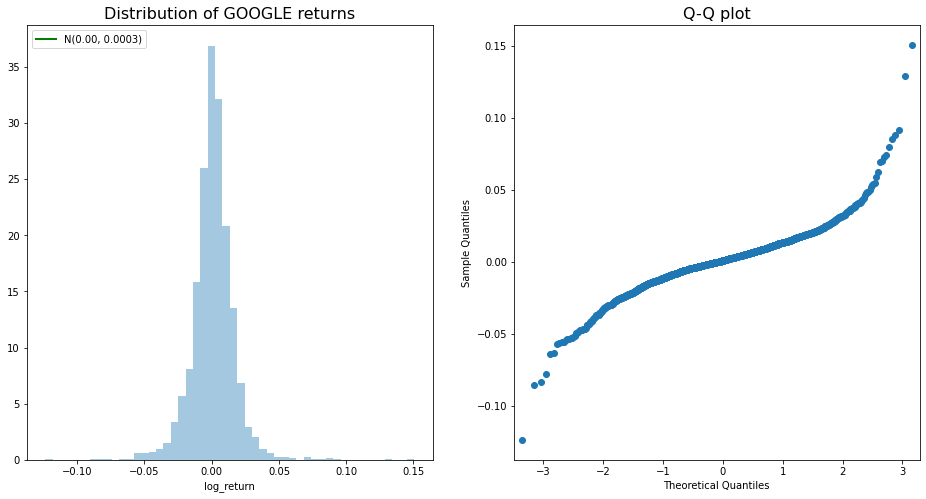

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

#Histogram
sns.distplot(df_google.log_return, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of GOOGLE returns', fontsize = 16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

#Q-Q plot
qq = sm.qqplot(df_google.log_return.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)

<AxesSubplot:title={'center':'Daily GOOGLE returns'}, xlabel='Date'>

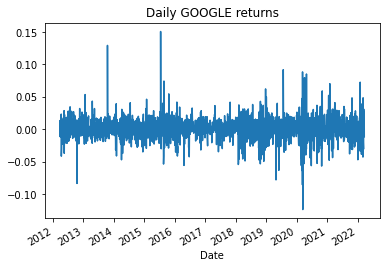

In [68]:
#Volatility clustering
df_google.log_return.plot(title='Daily GOOGLE returns')

We can observe clear clusters of volatility—periods of higher positive and
negative returns

Leverage effect

Calculate volatility measures as rolling standard deviations

In [69]:
df_google['moving_std_252'] = df_google[['log_return']].rolling(window=252).std()
df_google['moving_std_21'] = df_google[['log_return']].rolling(window=21).std()

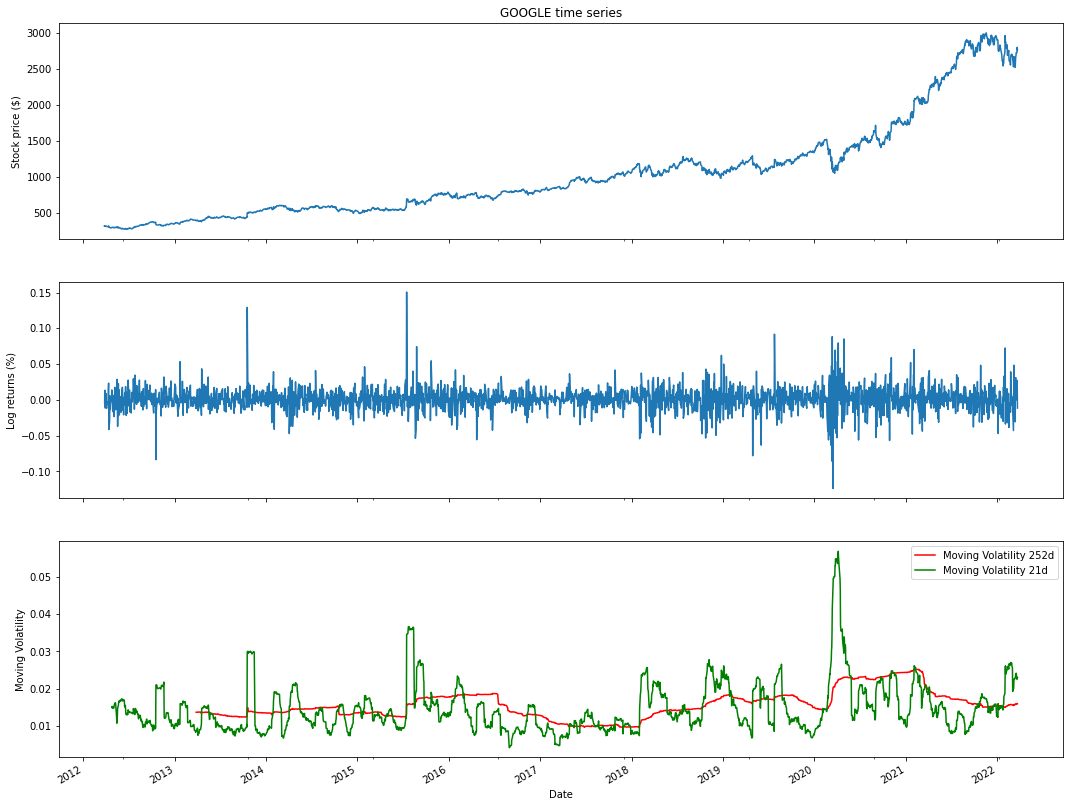

In [70]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
                    sharex=True)

df_google.adj_close.plot(ax=ax[0])
ax[0].set(title='GOOGLE time series',
            ylabel='Stock price ($)')

df_google.log_return.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df_google.moving_std_252.plot(ax=ax[2], color='r',
            label='Moving Volatility 252d')


df_google.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')

ax[2].set(ylabel='Moving Volatility',
        xlabel='Date')
ax[2].legend()

This fact states that most measures of an asset's volatility are negatively correlated
with its returns, and we can indeed observe a pattern of increased volatility when
the prices go down and decreased volatility when they are rising.
It also states that most measures of asset volatility are negatively correlated with their returns. To investigate it, we used the moving standard deviation (calculated using the rolling method of a pandas DataFrame) as a measure of historical volatility. We used
windows of 21 and 252 days, which correspond to one month and one year of trading data